# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We have the data for years 2019-2023 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2023.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [3]:
library(tidyverse)
library(readxl)



Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [4]:
df_price_index <- read_xlsx("revised-seasonally-adjusted-indexes-2023.xlsx")

df_price_index

ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2019,252.561,253.319,254.277,255.233,255.296,255.213,255.802,256.036,256.430,257.155,257.879,258.630
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2020,258.906,259.246,258.150,256.126,255.848,257.004,258.408,259.366,259.951,260.249,260.895,262.005
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2021,262.518,263.583,264.910,266.752,268.452,270.664,271.994,272.789,273.887,276.434,278.799,280.808
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2022,282.390,284.535,287.553,288.764,291.359,294.996,294.977,295.209,296.341,297.863,298.648,298.812
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2023,300.356,301.509,301.744,303.032,303.365,304.003,304.628,306.187,307.288,307.531,308.024,308.742
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2019,99.664,99.786,99.971,100.123,100.312,100.364,100.301,100.204,100.128,100.074,99.740,99.360
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2020,99.639,99.781,99.986,100.103,100.213,100.309,100.268,100.213,100.127,100.053,99.745,99.416
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2021,99.643,99.784,99.988,100.113,100.277,100.381,100.371,100.285,100.154,100.056,99.695,99.286
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2022,99.560,99.712,99.983,100.119,100.322,100.446,100.440,100.326,100.158,100.050,99.686,99.326


We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for over the period covered in the dataset (2019-2023).

Execute this cell. You'll need this months vector for the picot operation below:

In [5]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

months

[1] "JAN" "FEB" "MAR" "APR" "MAY" "JUN" "JUL" "AUG" "SEP" "OCT" "NOV" "DEC"

Here are the operations you'll need to perform:
- filter for...
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Create a column for the date with this mutate operation: `mutate(date_str = glue::glue('{YEAR}-{name}-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d'))`
- Group by `date` and `summarize` by taking the mean value for each date group.


In [6]:
df_price_index |>
    filter(TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')) |>
    filter(DATA_TYPE == 'SEASONALLY ADJUSTED INDEX') |>
    pivot_longer(cols = months) |>
    mutate(date_str = glue::glue('{YEAR}-{name}-01') |> 
    str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d'))

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(months)

  # Now:
  data %>% select(all_of(months))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


ITEM,TITLE,seriesid,DATA_TYPE,YEAR,name,value,date_str,date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,JAN,204.340,2019-jan-01,2019-01-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,FEB,208.144,2019-feb-01,2019-02-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,MAR,214.934,2019-mar-01,2019-03-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,APR,222.420,2019-apr-01,2019-04-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,MAY,220.523,2019-may-01,2019-05-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,JUN,214.926,2019-jun-01,2019-06-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,JUL,216.696,2019-jul-01,2019-07-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,AUG,213.847,2019-aug-01,2019-08-01
SA0E,Energy,CUSR0000SA0E,SEASONALLY ADJUSTED INDEX,2019,SEP,213.015,2019-sep-01,2019-09-01


In [7]:
sum_by_cat = df_price_index |>
    filter(TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')) |>
    filter(DATA_TYPE == 'SEASONALLY ADJUSTED INDEX') |>
    pivot_longer(cols = months) |>
    mutate(date_str = glue::glue('{YEAR}-{name}-01') |> 
    str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d')) |>
    group_by(date, TITLE) |>
    summarize(mean_value = mean(value))

sum_by_cat

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


date,TITLE,mean_value
<date>,<chr>,<dbl>
2019-01-01,Energy,203.6260
2019-01-01,Food,255.8640
2019-01-01,Shelter,309.3705
2019-01-01,Used cars and trucks,142.6770
2019-02-01,Energy,207.6265
2019-02-01,Food,256.5735
2019-02-01,Shelter,310.4100
2019-02-01,Used cars and trucks,142.7450
2019-03-01,Energy,214.6510


The first three rows of your table will look something like this:

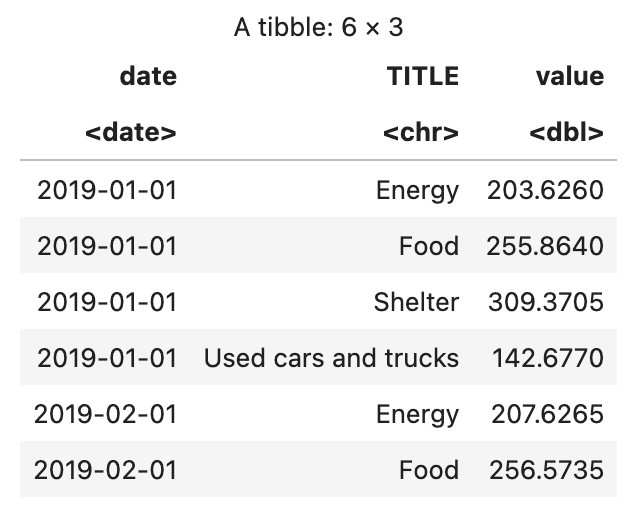

Ok! Now make this plot:

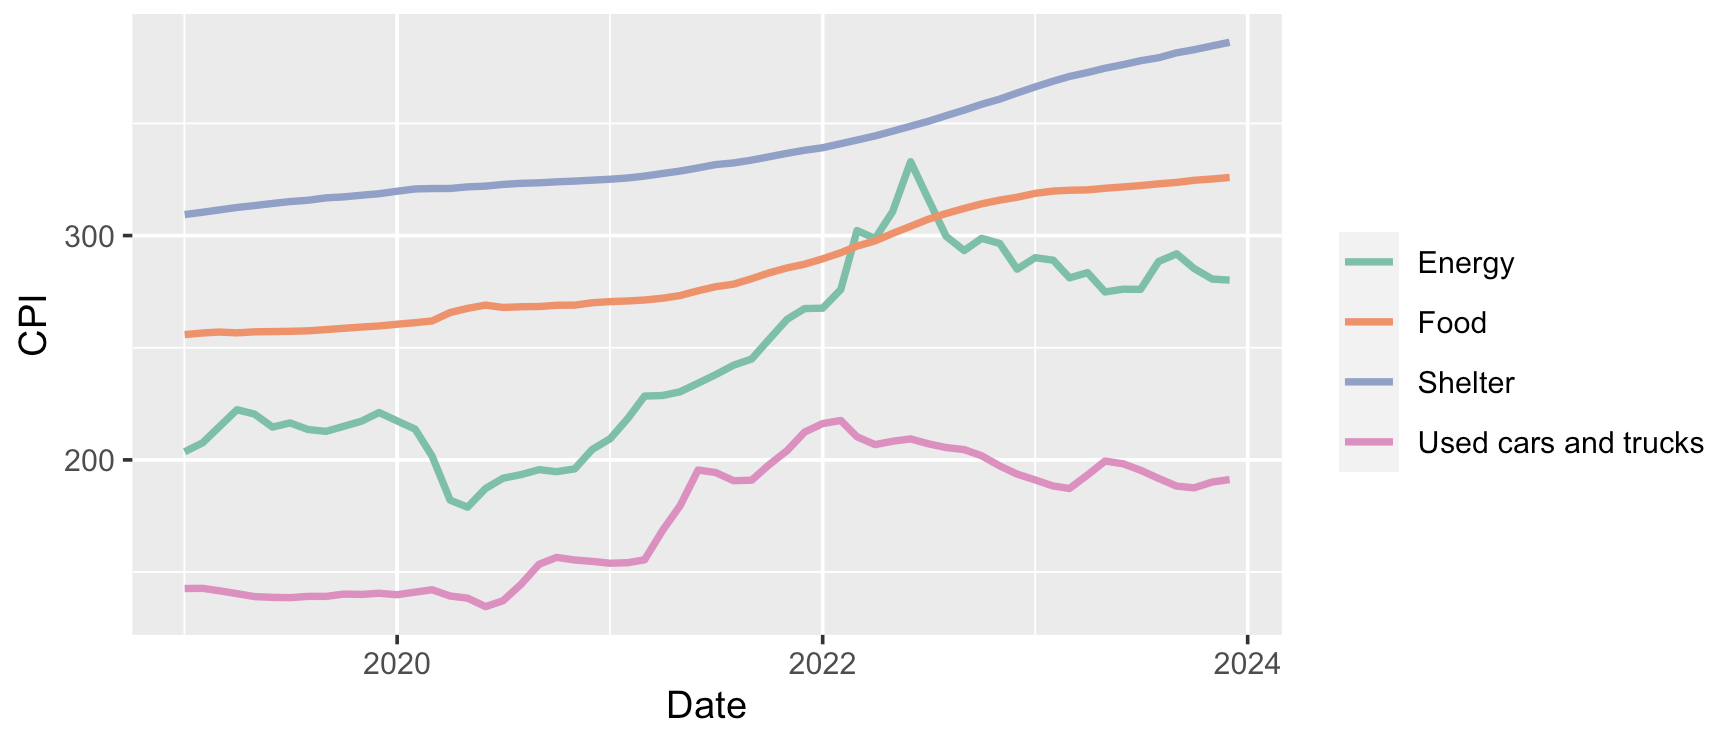

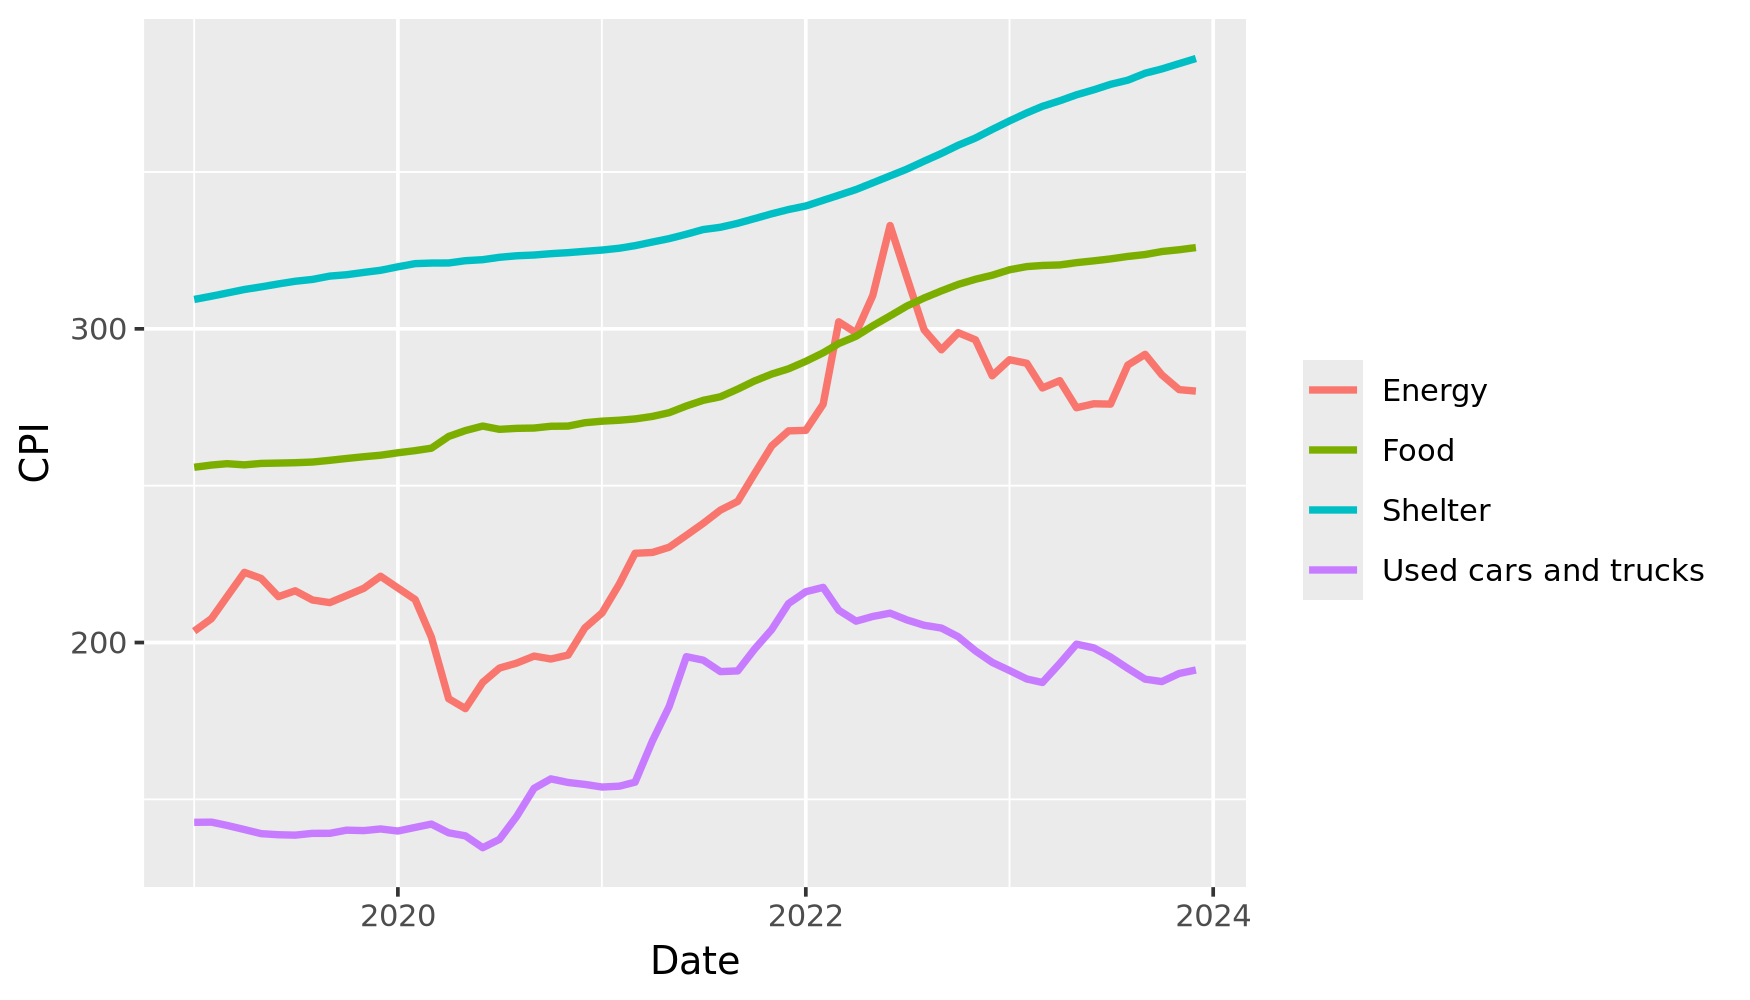

In [10]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 7)

p  <- ggplot(sum_by_cat, aes(x = date, y = mean_value, color = TITLE)) + geom_line(linewidth = 1) +
labs(
        x = 'Date',
        y = 'CPI',
        color = ' '
)

p


This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.